In [38]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import seaborn as sns 

from sklearn.pipeline import Pipeline
from sklearn.base import clone
from sklearn.ensemble import RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF 
from sklearn.svm import SVC 
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import BernoulliRBM, MLPClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score

In [39]:
# Get Data from File
csv_filename = "qc aggregated data.csv"
df = pd.read_csv(csv_filename)

# Specify Input and Output from Data
# input_columns = ["tempmax", "tempmin", "temp", "feelslikemax", "feelslikemin", "feelslike", "dew", "humidity", "windspeed"]
input_columns = ["temp", "feelslike", "dew", "humidity", "windspeed"]
output_column = ["conditions"]

# Access from dataframe the specified input and output columns
df = df[input_columns + output_column]
df.conditions = df.conditions.shift(-1)
df.dropna(inplace=True)

# Convert dataframe input and output columns to their equivalent numpy arrays
X = df[input_columns].to_numpy()
Y = df[output_column].to_numpy()
X = X.astype(float)

# Use Min Max Scaler to Scale to 0 and 1 for RBM
mms = MinMaxScaler()
X = mms.fit_transform(X)

# Encode string values of conditions to numerical equivalent
le = LabelEncoder()
Y = le.fit_transform(Y)

# Map Class Names to Dictionary for Confusion Matrix Labelling
label_mapping = {x: y for x, y in zip(le.transform(le.classes_), le.classes_)}
lm = list(label_mapping.values())
lm = [x.replace(",", ",\n") for x in lm]

c:\Users\Alaric\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [40]:
# Split data (initial)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

# Resplit data if representation of data is not equal
while (len(np.unique(Y_train)) != len(le.classes_)) or (len(np.unique(Y_test)) != len(le.classes_)):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)


In [44]:
# Base Models
base_rbm = BernoulliRBM(n_components = 512, learning_rate = 0.001, batch_size = 32, n_iter = 10, verbose = 1)
base_rfc = RandomForestClassifier(verbose = 1)
base_dtc = DecisionTreeClassifier()
base_svc = SVC(verbose = 1)
base_gpc = GaussianProcessClassifier()
base_mlp = MLPClassifier(verbose = 1)
base_knn = KNeighborsClassifier()

# Create multiple models
model_names = [
    "Random Forest",
    "Decision Tree",
    "Support Vector Machine",
    "Gaussian Process",
    "K Nearest Neighbors",
    "Multilayer Perceptron",
]
models = [
    Pipeline(steps=[("dbn1", clone(base_rbm)), ("dbn2", clone(base_rbm)), ("rfc", clone(base_rfc))]),
    Pipeline(steps=[("dbn1", clone(base_rbm)), ("dbn2", clone(base_rbm)), ("dtc", clone(base_rfc))]),
    Pipeline(steps=[("dbn1", clone(base_rbm)), ("dbn2", clone(base_rbm)), ("svc", clone(base_rfc))]),
    Pipeline(steps=[("dbn1", clone(base_rbm)), ("dbn2", clone(base_rbm)), ("gpc", clone(base_rfc))]),
    Pipeline(steps=[("dbn1", clone(base_rbm)), ("dbn2", clone(base_rbm)), ("mlpc", clone(base_rfc))]),
    Pipeline(steps=[("dbn1", clone(base_rbm)), ("dbn2", clone(base_rbm)), ("knn", clone(base_rfc))]),
]
model_accuracies = []

[BernoulliRBM] Iteration 1, pseudo-likelihood = -3.01, time = 0.12s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -2.93, time = 0.19s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -2.83, time = 0.17s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -2.86, time = 0.24s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -2.81, time = 0.31s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -2.85, time = 0.39s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -2.82, time = 0.32s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -2.85, time = 0.24s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -2.90, time = 0.19s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -2.81, time = 0.18s
[BernoulliRBM] Iteration 1, pseudo-likelihood = -354.88, time = 0.97s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -354.88, time = 1.03s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -354.88, time = 1.01s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -354.88, time = 1.02s
[BernoulliRBM] Iteration 5, pseudo-like

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    4.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[BernoulliRBM] Iteration 1, pseudo-likelihood = -3.00, time = 0.13s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -2.89, time = 0.25s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -2.86, time = 0.26s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -2.85, time = 0.22s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -2.82, time = 0.24s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -2.79, time = 0.25s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -2.78, time = 0.23s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -2.83, time = 0.22s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -2.82, time = 0.21s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -2.82, time = 0.22s
[BernoulliRBM] Iteration 1, pseudo-likelihood = -354.88, time = 1.12s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -354.87, time = 1.50s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -354.88, time = 1.76s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -354.88, time = 1.74s
[BernoulliRBM] Iteration 5, pseudo-like

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    3.9s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[BernoulliRBM] Iteration 1, pseudo-likelihood = -2.98, time = 0.11s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -2.89, time = 0.19s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -2.85, time = 0.21s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -2.84, time = 0.19s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -2.82, time = 0.20s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -2.86, time = 0.18s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -2.83, time = 0.19s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -2.81, time = 0.19s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -2.83, time = 0.20s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -2.82, time = 0.18s
[BernoulliRBM] Iteration 1, pseudo-likelihood = -354.88, time = 1.06s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -354.88, time = 1.71s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -354.88, time = 1.76s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -354.88, time = 1.40s
[BernoulliRBM] Iteration 5, pseudo-like

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    5.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[BernoulliRBM] Iteration 1, pseudo-likelihood = -2.97, time = 0.12s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -2.90, time = 0.21s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -2.93, time = 0.21s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -2.83, time = 0.20s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -2.86, time = 0.19s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -2.83, time = 0.19s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -2.87, time = 0.22s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -2.84, time = 0.20s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -2.86, time = 0.20s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -2.85, time = 0.20s
[BernoulliRBM] Iteration 1, pseudo-likelihood = -354.88, time = 0.94s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -354.88, time = 1.35s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -354.88, time = 1.47s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -354.88, time = 1.60s
[BernoulliRBM] Iteration 5, pseudo-like

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    4.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[BernoulliRBM] Iteration 1, pseudo-likelihood = -2.98, time = 0.11s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -2.92, time = 0.20s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -2.88, time = 0.21s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -2.88, time = 0.27s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -2.85, time = 0.26s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -2.87, time = 0.22s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -2.86, time = 0.21s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -2.88, time = 0.21s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -2.83, time = 0.22s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -2.87, time = 0.20s
[BernoulliRBM] Iteration 1, pseudo-likelihood = -354.88, time = 0.95s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -354.88, time = 1.40s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -354.88, time = 1.99s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -354.87, time = 1.42s
[BernoulliRBM] Iteration 5, pseudo-like

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    4.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[BernoulliRBM] Iteration 1, pseudo-likelihood = -2.98, time = 0.12s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -2.90, time = 0.20s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -2.89, time = 0.21s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -2.84, time = 0.20s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -2.87, time = 0.20s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -2.85, time = 0.19s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -2.89, time = 0.21s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -2.89, time = 0.20s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -2.83, time = 0.21s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -2.86, time = 0.19s
[BernoulliRBM] Iteration 1, pseudo-likelihood = -354.88, time = 0.98s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -354.88, time = 1.30s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -354.87, time = 1.36s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -354.88, time = 1.26s
[BernoulliRBM] Iteration 5, pseudo-like

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    4.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


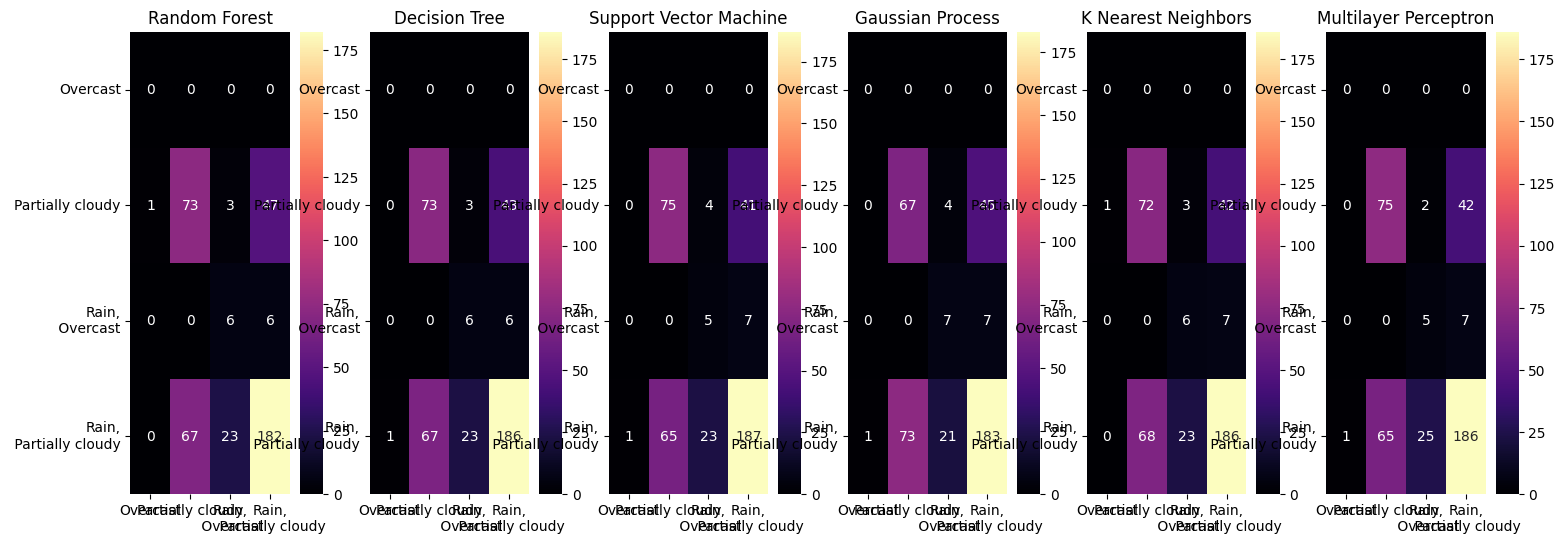

In [45]:
plt.figure(figsize=(18, 6))

# Iterate through all the models (need to enumerate for the index num)
for idx, (model, model_name) in enumerate(zip(models, model_names)):
    model.fit(X_train, Y_train)
    Y_pred_test = model.predict(X_test)
    CM_test = confusion_matrix(Y_pred_test, Y_test)
    test_acc = accuracy_score(Y_test, Y_pred_test)
    model_accuracies.append(test_acc)


    ax = plt.subplot(int(f'1{len(models)}{idx+1}'))
    ax.set_title(model_name)
    sns.heatmap(CM_test, annot=True, cmap="magma", ax=ax, fmt='d')
    ax.xaxis.set_ticklabels(lm)
    ax.yaxis.set_ticklabels(lm)
    plt.yticks(rotation=0)


plt.show()